In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('/content/linkedin-reviews - linkedin-reviews.csv')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


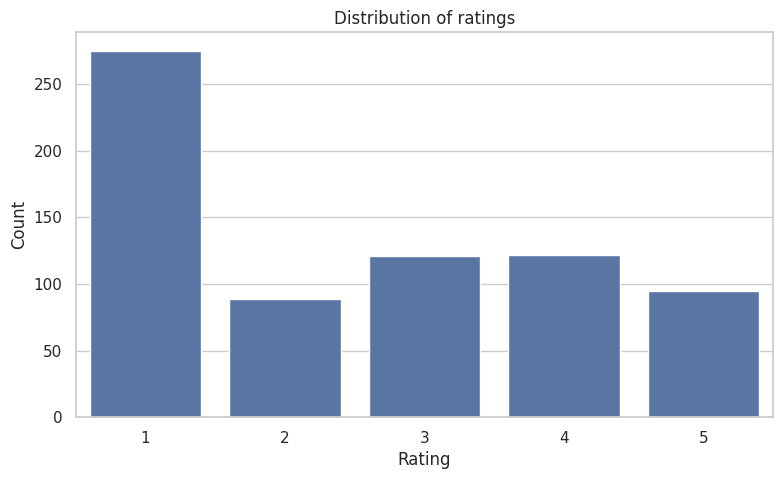

In [9]:
# Plotting the distribution of ratings
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data = df , x = 'Rating')
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [10]:
!pip install textblob

In [11]:
from textblob import TextBlob

In [12]:
def textblob_sentiment_analysis(review):
  sentiment = TextBlob(review).sentiment
  if sentiment.polarity > 0.1:
    return 'Positive'
  elif sentiment.polarity < -0.1:
    return 'Negative'
  else:
    return 'Neutral'

In [13]:
df['Sentiment']=df['Review'].apply(textblob_sentiment_analysis)

In [15]:
df.sample(5)

,Review,Rating,Sentiment
508,NICE!,5,Positive
250,Great tool for linkedin. Wish is allowed for R...,4,Positive
243,"Just loads forever, even on WiFi. Can't contac...",1,Neutral
653,Latest update just made this a five star app,4,Positive
343,Update to version 1.1.1 still crashes at opening,1,Neutral


In [17]:
# Analyzing app review sentiments
sentiment_distribution=df['Sentiment'].value_counts()
sentiment_distribution

,count
Sentiment,
Neutral,300
Positive,295
Negative,107


/tmp/ipython-input-1953276429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index,


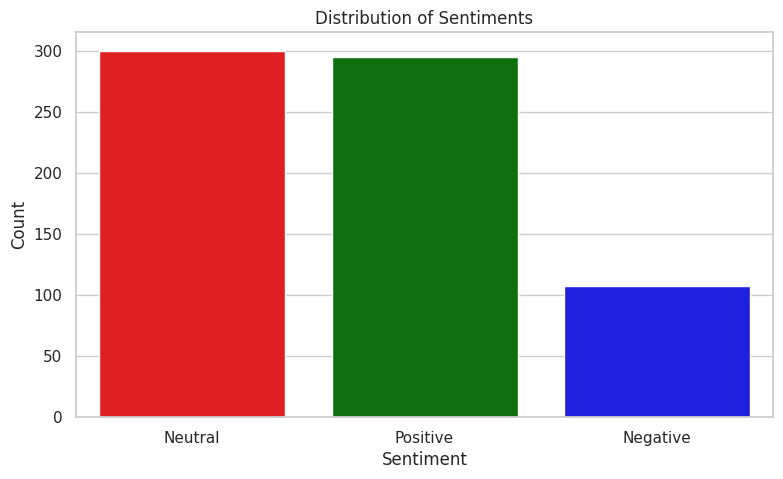

In [19]:
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distribution.index,
            y=sentiment_distribution.values,
            palette=['red','green','blue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

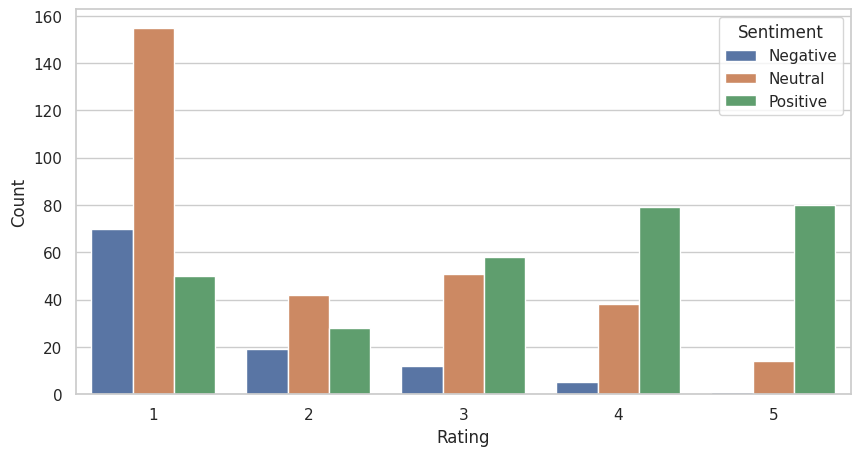

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,
              x='Rating',
              hue='Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()